# DESPLIEGUE (puesta en producción)

**Luego de haber cubierto muchas etapas de Ciencia de Datos, se hará un ejercicio completo que va desde la creación de un modelo, hasta el despliegue del mismo a través de un sitio web**

# Datos

Para este ejercicio se usará uno de los conjuntos de datos más comunes en el estudio de Data Science: [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), que es sobre flores. 

**Tomado de Wikipedia:**

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3]

El conjunto de datos consta de 50 muestras de cada una de las tres especies de las Iris (Iris setosa, Iris virginica e Iris versicolor). Se midieron cuatro características de cada muestra: la longitud y el ancho de los pétalos y sépalos, en centímetros. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

In [2]:
iris = pd.read_csv("./Datos/iris.csv")

In [3]:
iris.head()

,long_sepalo,ancho_sepalo,long_petalo,ancho_petalo,especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Procesamiento de Datos

### Características "Features" y Meta "Target"

In [4]:
X = iris.drop('especie',axis = 1)
y = iris['especie']

In [5]:
iris['especie'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Hay varias formas de hacer "one-hot encode"

https://stackoverflow.com/questions/47573293/unable-to-transform-string-column-to-categorical-matrix-using-keras-and-sklearn

https://stackoverflow.com/questions/35107559/one-hot-encoding-of-string-categorical-features

In [6]:
from sklearn.preprocessing import LabelBinarizer
codificador = LabelBinarizer()
y = codificador.fit_transform(y)

In [7]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, 
                                                            random_state = 101)

### Cambiar la escala de los datos - Normalizar

In [10]:
normalizador = MinMaxScaler()

In [11]:
normalizador.fit(X_entreno.values)

MinMaxScaler()

In [12]:
X_entreno_normalizado = normalizador.transform(X_entreno.values)

In [13]:
X_prueba_normalizado = normalizador.transform(X_prueba.values)

## Modelo


### Crear el Modelo

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
modelo = Sequential()
modelo.add(Dense(units = 4,
                 activation = 'relu',
                 input_shape = [4,]))

# Ultima capa para clasificación multi-clase              
#    de las tres especies
modelo.add(Dense(units = 3,
                 activation = 'softmax'))

modelo.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Entrenamiento del Modelo

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
detencion_temprana = EarlyStopping(patience = 10)

In [18]:
modelo.fit(x = X_entreno_normalizado, 
          y = y_entreno, 
          epochs = 300,
          validation_data = (X_prueba_normalizado, 
                             y_prueba), 
          verbose = 1 , 
          callbacks = [detencion_temprana]
          )

Epoch 1/300
4/4 [==============================] - 0s 19ms/step - loss: 1.0248 - accuracy: 0.6833 - val_loss: 1.0607 - val_accuracy: 0.5667
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 1.0215 - accuracy: 0.6833 - val_loss: 1.0581 - val_accuracy: 0.5667
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 1.0184 - accuracy: 0.6833 - val_loss: 1.0555 - val_accuracy: 0.5667
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 1.0154 - accuracy: 0.6833 - val_loss: 1.0530 - val_accuracy: 0.5667
Epoch 5/300
1/4 [======>.......................] - ETA: 0s - loss: 0.9766 - accuracy: 0.6875

2023-10-13 10:39:38.147266: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 0s 3ms/step - loss: 1.0124 - accuracy: 0.6833 - val_loss: 1.0505 - val_accuracy: 0.5667
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 1.0094 - accuracy: 0.6833 - val_loss: 1.0481 - val_accuracy: 0.5667
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 1.0062 - accuracy: 0.6833 - val_loss: 1.0458 - val_accuracy: 0.5667
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 1.0033 - accuracy: 0.6833 - val_loss: 1.0437 - val_accuracy: 0.5667
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 1.0001 - accuracy: 0.6833 - val_loss: 1.0416 - val_accuracy: 0.5667
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.9970 - accuracy: 0.6833 - val_loss: 1.0393 - val_accuracy: 0.5667
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 0.9936 - accuracy: 0.6833 - val_loss: 1.0368 - val_accuracy: 0.5667
Epoch 12/300
4/4 [===================

## Evaluación del Modelo

In [19]:
metricas = pd.DataFrame(modelo.history.history)

In [20]:
metricas

,loss,accuracy,val_loss,val_accuracy
0,1.024777,0.683333,1.060673,0.566667
1,1.021513,0.683333,1.058108,0.566667
2,1.018391,0.683333,1.055492,0.566667
3,1.015431,0.683333,1.052984,0.566667
4,1.012361,0.683333,1.050480,0.566667
...,...,...,...,...
295,0.493768,0.833333,0.540392,0.900000
296,0.492957,0.833333,0.539213,0.900000
297,0.492038,0.841667,0.538346,0.900000
298,0.491271,0.841667,0.537508,0.900000


<Axes: >

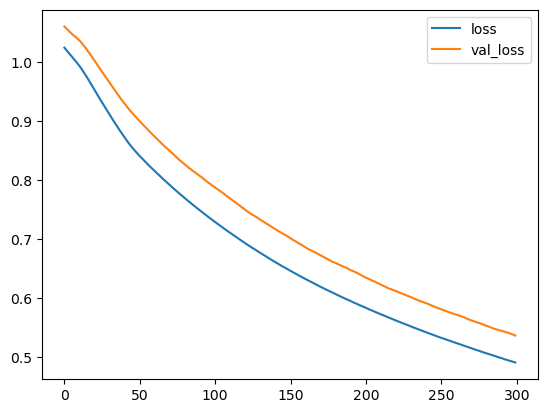

In [21]:
metricas[['loss', 'val_loss']].plot()

<Axes: >

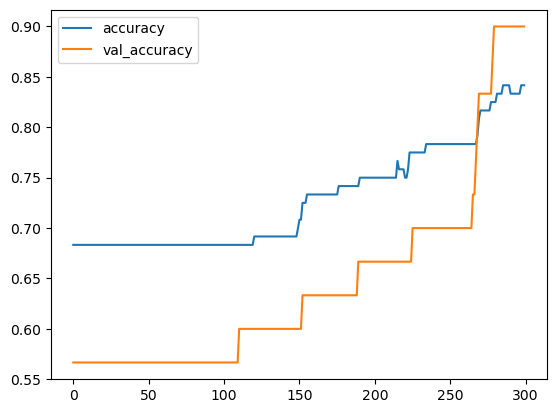

In [22]:
metricas[['accuracy', 'val_accuracy']].plot()

In [23]:
modelo.evaluate(X_prueba_normalizado,
                y_prueba,
                verbose = 2)

1/1 - 0s - loss: 0.5363 - accuracy: 0.9000 - 8ms/epoch - 8ms/step


[0.5362784266471863, 0.8999999761581421]

## Preparar el Modelo para Despliegue (o puesta en producción)

In [24]:
epocas = len(metricas)

### Notar que el ajuste se hace con todos los datos

In [25]:
X_normalizado = normalizador.fit_transform(X.values)

In [26]:
X_normalizado

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [27]:
modelo = Sequential()
modelo.add(Dense(units = 4,
                 activation = 'relu',
                input_shape = X_normalizado.shape[1:]))

# Ultima capa para clasificación multi-clase
#   de las tres especies
modelo.add(Dense(units = 3,
                 activation = 'softmax'))

modelo.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [28]:
modelo.fit(X_normalizado, y, epochs = epocas)

Epoch 1/300
5/5 [==============================] - 0s 658us/step - loss: 1.1124 - accuracy: 0.3067
Epoch 2/300
5/5 [==============================] - 0s 578us/step - loss: 1.1105 - accuracy: 0.3067
Epoch 3/300
5/5 [==============================] - 0s 565us/step - loss: 1.1087 - accuracy: 0.3067
Epoch 4/300
5/5 [==============================] - 0s 676us/step - loss: 1.1070 - accuracy: 0.3133
Epoch 5/300
5/5 [==============================] - 0s 740us/step - loss: 1.1056 - accuracy: 0.3133
Epoch 6/300
5/5 [==============================] - 0s 578us/step - loss: 1.1040 - accuracy: 0.3133
Epoch 7/300
5/5 [==============================] - 0s 744us/step - loss: 1.1026 - accuracy: 0.3133
Epoch 8/300
5/5 [==============================] - 0s 546us/step - loss: 1.1011 - accuracy: 0.3133
Epoch 9/300
5/5 [==============================] - 0s 525us/step - loss: 1.0997 - accuracy: 0.3133
Epoch 10/300
5/5 [==============================] - 0s 447us/step - loss: 1.0984 - accuracy: 0.3133
Epoch 11/

In [29]:
modelo.save("modelo_final_iris.h5")

### Guardar el Normalizador

In [30]:
import joblib

In [31]:
joblib.dump(normalizador,'normalizador_iris.pkl')

['normalizador_iris.pkl']

## Proceso para predecir una flor nueva

In [32]:
from tensorflow.keras.models import load_model

**NOTA**

Puede ser que las siguientes instrucciones causen un error:

AttributeError: 'str' object has no attribute 'decode'

Si este es el caso hay que bajar la versión del paquete hp5y.  Se puede hacer de la siguiente forma:

pip install 'h5py==2.10.0' --force-reinstall

o con Conda:

conda install 'h5py==2.10.0'

In [33]:
modelo_flor = load_model("modelo_final_iris.h5")
normalizador_flor = joblib.load("normalizador_iris.pkl")

In [34]:
iris.head(1)

,long_sepalo,ancho_sepalo,long_petalo,ancho_petalo,especie
0,5.1,3.5,1.4,0.2,Iris-setosa


In [35]:
muestra_flor = {'long_sepalo':5.1,
                 'ancho_sepalo':3.5,
                 'long_petalo':1.4,
                 'ancho_petalo':0.2}

In [36]:
muestra_flor.keys()

dict_keys(['long_sepalo', 'ancho_sepalo', 'long_petalo', 'ancho_petalo'])

In [37]:
codificador.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

### La siguiente función utiliza una llamada para predecir la clase en base a datos en una estructura jason

A partir del 2021 cambio la forma de hacer la llamada y esta es la indicación:

model.predict_classes() is deprecated and will be removed after 2021-01-01. 

Please use instead: 

**np.argmax(model.predict(x), axis=-1)**, 

if your model does multi-class classification (e.g. if it uses a softmax last-layer activation). 

**(model.predict(x) > 0.5).astype("int32")**, 

if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).

In [38]:
def devuelve_prediccion(modelo, normalizador, muestra_json):
    
    # Si fueran muchas más características,
    #   probablemente sería bueno codificar
    #   una iteración que contruya este arreglo
    
    long_sep = muestra_json['long_sepalo']
    ancho_sep = muestra_json['ancho_sepalo']
    long_pet = muestra_json['long_petalo']
    ancho_pet = muestra_json['ancho_petalo']
    
    flor = [[long_sep, ancho_sep,
             long_pet, ancho_pet]]
    
    flor = normalizador.transform(flor)
    
    clases = np.array(['Iris-setosa', 
                       'Iris-versicolor', 
                       'Iris-virginica'])
    
    #clase_ind = modelo.predict_classes(flor)
    clase_ind = np.argmax(modelo.predict(flor), axis = -1)    
    
    return clases[clase_ind][0]                

In [39]:
devuelve_prediccion(modelo_flor,
                    normalizador_flor,
                    muestra_flor)

1/1 [==============================] - 0s 32ms/step


'Iris-setosa'

# CODIGO PARA DESPLIEGUE:

Ponerlo todo en una sola celda para copiarlo ya que será necesario crear un script .py|

In [40]:
from tensorflow.keras.models import load_model
import joblib


modelo_flor = load_model("modelo_final_iris.h5")
normalizador_flor = joblib.load("normalizador_iris.pkl") 

def devuelve_prediccion(modelo, nomalizador, muestra_json):
    
    # Si fueran muchas más características,
    #   probablemente sería bueno codificar
    #   una iteración que contruya este arreglo
    
    long_sep = muestra_json['long_sepalo']
    ancho_sep = muestra_json['ancho_sepalo']
    long_pet = muestra_json['long_petalo']
    ancho_pet = muestra_json['ancho_petalo']
    
    flor = [[long_sep, ancho_sep,
             long_pet, ancho_pet]]
    
    flor = normalizador.transform(flor)
    
    clases = np.array(['Iris-setosa', 
                       'Iris-versicolor', 
                       'Iris-virginica'])
    
    clase_ind = modelo.predict_classes(flor)
    
    return clases[clase_ind][0]

    

In [41]:
muestra_flor = {'long_sepalo':5.1,
                 'ancho_sepalo':3.5,
                 'long_petalo':1.4,
                 'ancho_petalo':0.2}